In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
train_data='train_dataset.csv'
test_data='X_test.csv'
y = 'y_test.csv'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
data = pd.read_csv(train_data)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [5]:
data.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [6]:
data.isnull().sum()

Year_Factor                      0
State_Factor                     0
building_class                   0
facility_type                    0
floor_area                       0
                             ...  
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
site_eui                         0
id                               0
Length: 64, dtype: int64

In [7]:
a=[]
for col in data.columns:
    if data[col].isnull().sum():
        a.append(col)

In [8]:
for i in a:
    nan_count = data.loc[:,i].isna().sum()
    print(f"Column {i} has {nan_count/data.shape[0]*100} % NaN values")

Column year_built has 2.42485842892406 % NaN values
Column energy_star_rating has 35.2561479467244 % NaN values
Column direction_max_wind_speed has 54.22865213775625 % NaN values
Column direction_peak_wind_speed has 55.19093945113983 % NaN values
Column max_wind_speed has 54.22865213775625 % NaN values
Column days_with_fog has 60.45117942896366 % NaN values


In [9]:
print(a)

['year_built', 'energy_star_rating', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']


In [12]:
 # since these column have majority of classes as nan so we will drop it
 # direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog'

# and for the other two we could do the imputation..

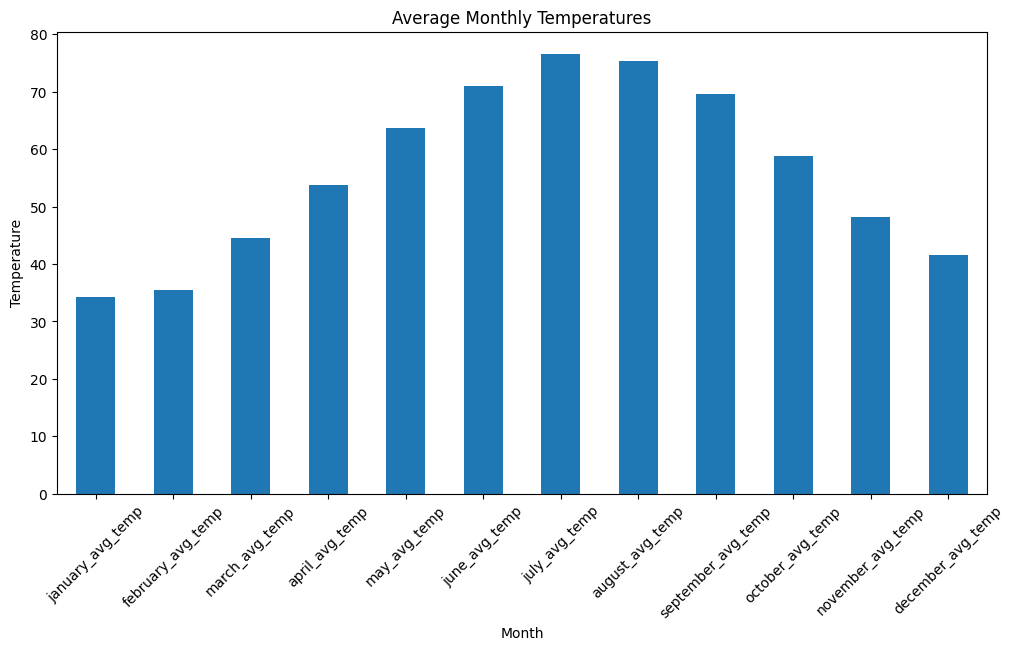

In [10]:
monthly_avg_temps = data.filter(like='_avg_temp').mean()
plt.figure(figsize=(12, 6))
monthly_avg_temps.plot(kind='bar')
plt.title('Average Monthly Temperatures')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.show()

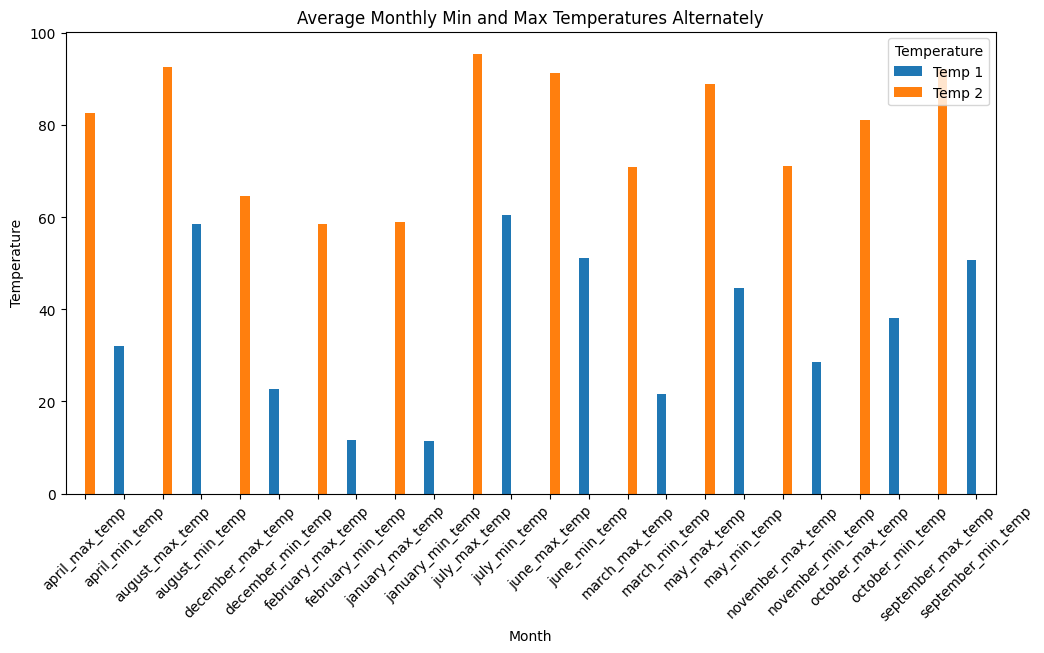

In [11]:
# Selecting columns for min and max temperatures
min_temp_cols = data.filter(like='_min_temp').columns
max_temp_cols = data.filter(like='_max_temp').columns

# Creating a DataFrame for min and max temperatures
min_temp_data = data[min_temp_cols].mean()
max_temp_data = data[max_temp_cols].mean()

# Combining min and max temperatures alternately
temp_data = pd.concat([min_temp_data, max_temp_data], axis=1)
temp_data.columns = ['Temp 1', 'Temp 2']
temp_data = temp_data.sort_index(axis=0)

# Plotting
temp_data.plot(kind='bar', figsize=(12, 6))
plt.title('Average Monthly Min and Max Temperatures Alternately')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.legend(title='Temperature')
plt.show()

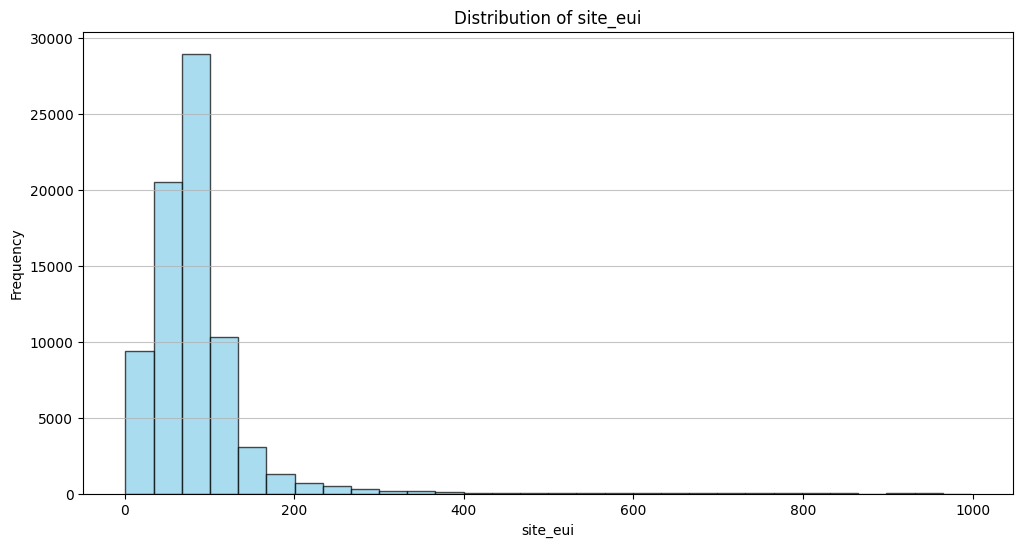

In [15]:
plt.figure(figsize=(12, 6))
plt.hist(data['site_eui'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of site_eui')
plt.xlabel('site_eui')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_6836\2438740254.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


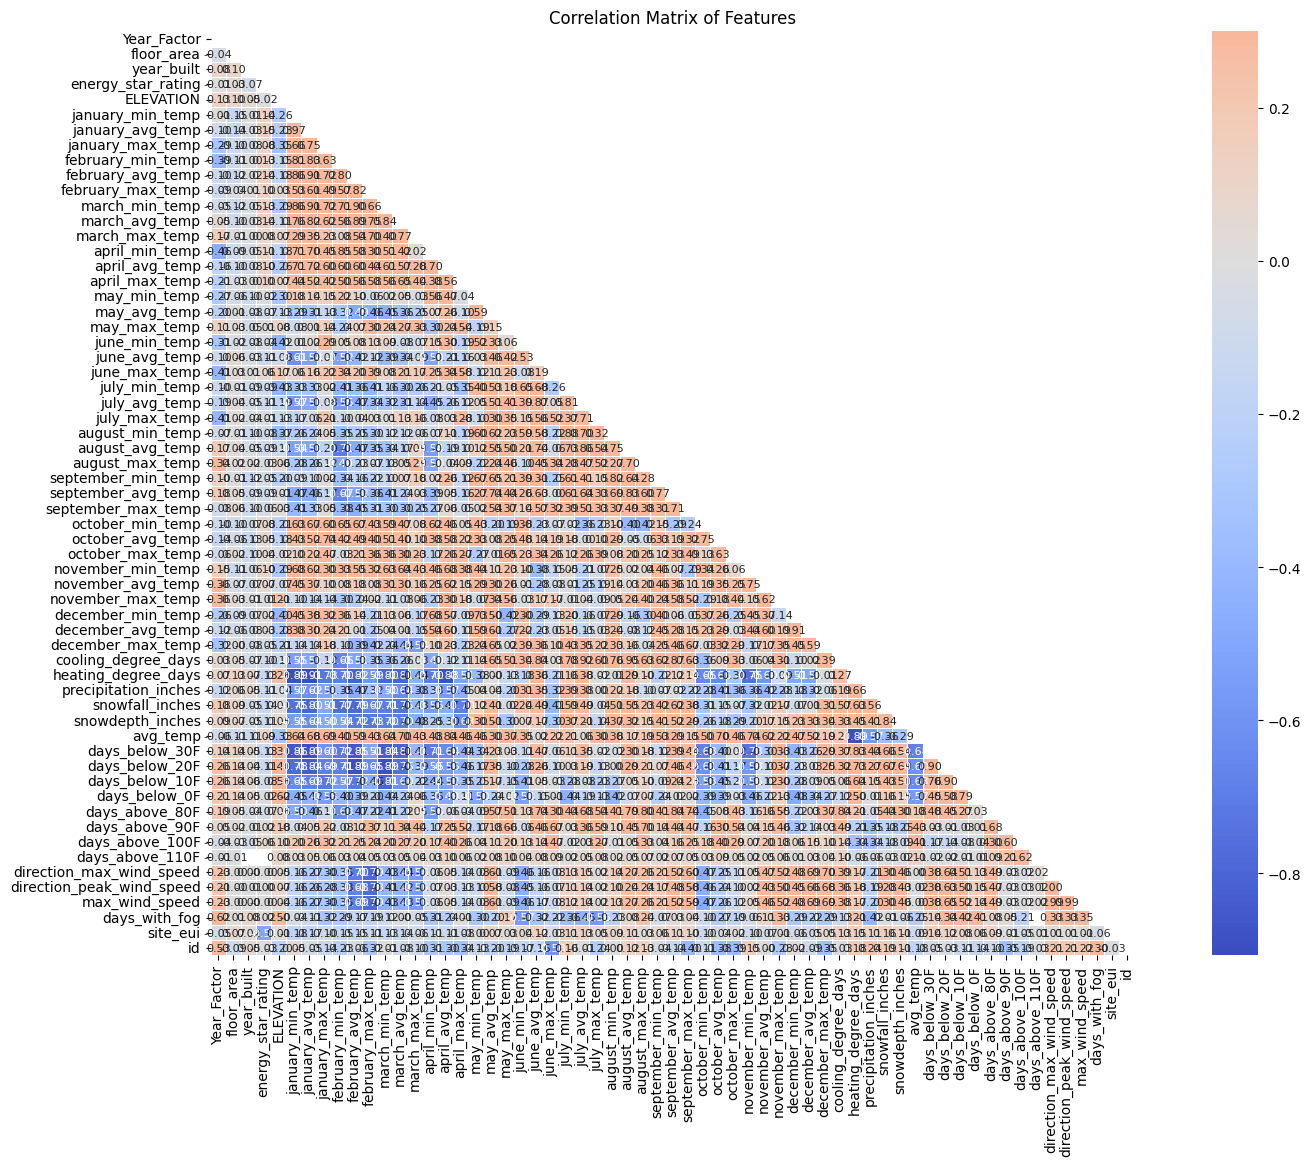

In [16]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f", annot_kws={"size": 8})

plt.title('Correlation Matrix of Features')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_4576\2742266092.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()['site_eui'].drop('site_eui')
C:\Users\hp\AppData\Local\Temp\ipykernel_4576\2742266092.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.index, y=correlation.values, palette='coolwarm')


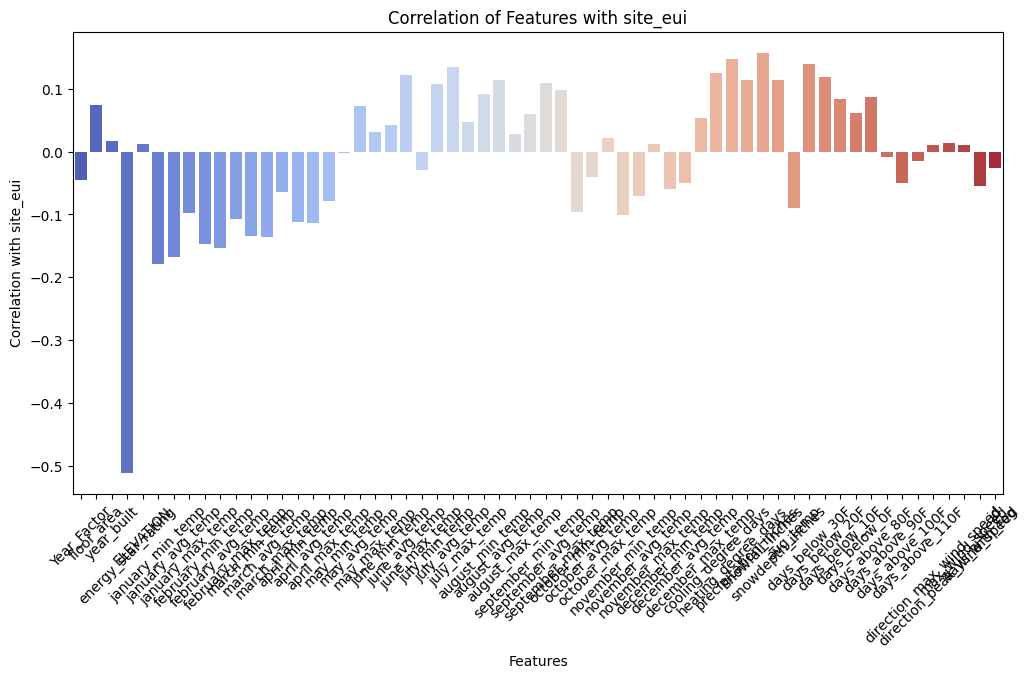

In [12]:
correlation = data.corr()['site_eui'].drop('site_eui')

# Plot the correlation values
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation.index, y=correlation.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Correlation with site_eui')
plt.title('Correlation of Features with site_eui')
plt.show()

In [13]:
selected_features = correlation[abs(correlation) >= 0.1].index.tolist()
print(len(selected_features))
print("Selected features:", selected_features)

23
Selected features: ['energy_star_rating', 'january_min_temp', 'january_avg_temp', 'february_min_temp', 'february_avg_temp', 'february_max_temp', 'march_min_temp', 'march_avg_temp', 'april_min_temp', 'april_avg_temp', 'june_avg_temp', 'july_min_temp', 'july_avg_temp', 'august_avg_temp', 'september_avg_temp', 'november_min_temp', 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'days_below_30F', 'days_below_20F']


In [14]:
data_cop = data.drop(selected_features,axis=1)

In [15]:
data_cop

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,ELEVATION,january_max_temp,march_max_temp,april_max_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,2.4,68,80,78,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,1.8,68,80,78,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,1.8,68,80,78,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,1.8,68,80,78,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,2.4,68,80,78,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,36.6,56,71,89,...,25,3,0,0,NaN,NaN,NaN,NaN,132.918411,75752
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,36.6,56,71,89,...,25,3,0,0,NaN,NaN,NaN,NaN,39.483672,75753
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,36.6,48,62,79,...,6,0,0,0,NaN,NaN,NaN,NaN,48.404398,75754
75755,6,State_11,Commercial,Commercial_Other,53575.0,2012.0,36.6,48,62,79,...,6,0,0,0,NaN,NaN,NaN,NaN,592.022750,75755


In [21]:
print("Length of selected_features:", len(selected_features))
print("Number of columns in data:", len(data.columns))

Length of selected_features: 23
Number of columns in data: 64


In [16]:
data_cop =data_cop.drop(['direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog'],axis=1)

In [17]:
l=['energy_star_rating','cooling_degree_days',	'heating_degree_days',	'precipitation_inches',	'snowfall_inches',	'snowdepth_inches']

In [24]:
# data_cop = data[l]

In [18]:
data_cop

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,ELEVATION,january_max_temp,march_max_temp,april_max_temp,...,december_max_temp,avg_temp,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,2.4,68,80,78,...,71,56.972603,0,0,14,0,0,0,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,1.8,68,80,78,...,71,56.972603,0,0,14,0,0,0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,1.8,68,80,78,...,71,56.972603,0,0,14,0,0,0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,1.8,68,80,78,...,71,56.972603,0,0,14,0,0,0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,2.4,68,80,78,...,71,56.972603,0,0,14,0,0,0,3.899395,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,36.6,56,71,89,...,51,55.147541,0,0,25,3,0,0,132.918411,75752
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,36.6,56,71,89,...,51,55.147541,0,0,25,3,0,0,39.483672,75753
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,36.6,48,62,79,...,46,47.911202,0,0,6,0,0,0,48.404398,75754
75755,6,State_11,Commercial,Commercial_Other,53575.0,2012.0,36.6,48,62,79,...,46,47.911202,0,0,6,0,0,0,592.022750,75755


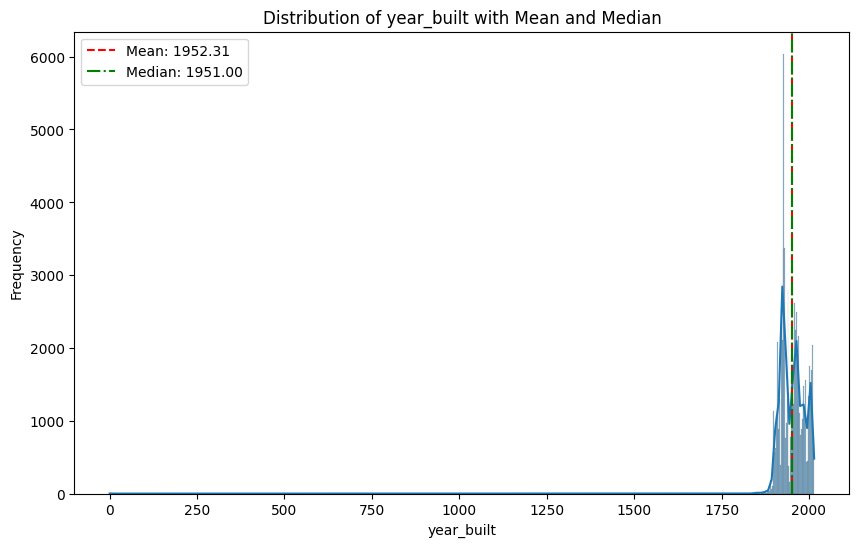

In [19]:
feature='year_built'
mean_value = data[feature].mean()
median_value = data[feature].median()

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data[feature], kde=True)
plt.axvline(x=mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(x=median_value, color='g', linestyle='-.', label=f'Median: {median_value:.2f}')
plt.legend()
plt.title(f'Distribution of {feature} with Mean and Median')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

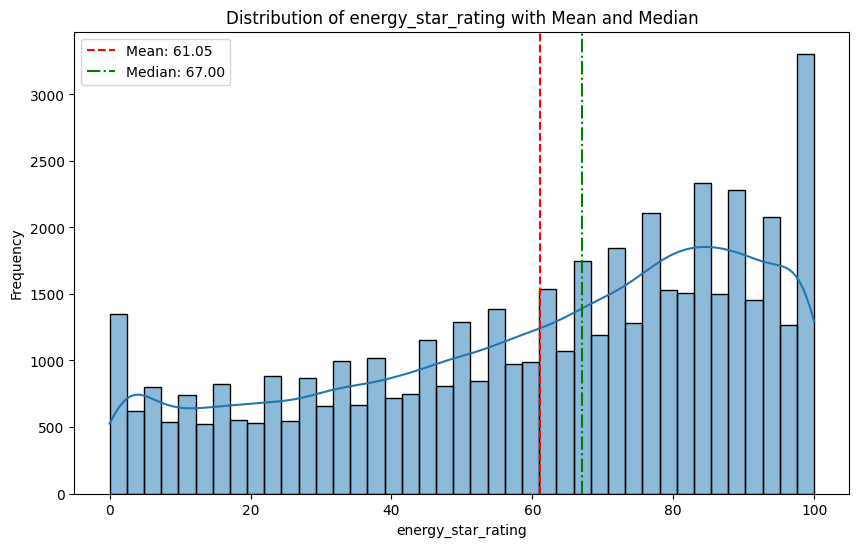

In [20]:
feature='energy_star_rating'
mean_value = data[feature].mean()
median_value = data[feature].median()

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data[feature], kde=True)
plt.axvline(x=mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(x=median_value, color='g', linestyle='-.', label=f'Median: {median_value:.2f}')
plt.legend()
plt.title(f'Distribution of {feature} with Mean and Median')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

In [21]:
data['days_above_110F']

0        0
1        0
2        0
3        0
4        0
        ..
75752    0
75753    0
75754    0
75755    0
75756    0
Name: days_above_110F, Length: 75757, dtype: int64

In [22]:
threshold = 50 # Define your threshold for almost constant

# Calculate the percentage of the most frequent value for each column in the training data
train_percentages = (data == data.mode().iloc[0]).sum() / len(data) * 100

# Find the columns that meet the threshold for being almost constant
almost_constant_train = train_percentages[train_percentages > threshold]

# Print the results
print("Columns in training data that are almost constant:")
print(almost_constant_train)

Columns in training data that are almost constant:
State_Factor       67.109310
building_class     57.496997
facility_type      52.080996
days_below_0F      75.775176
days_above_100F    94.634159
days_above_110F    99.919479
dtype: float64


In [23]:
columns_to_remove = ['State_Factor', 'building_class', 'facility_type', 'days_below_0F', 'days_above_100F', 'days_above_110F']
X_train = data_cop.drop(columns=columns_to_remove)

In [24]:
X=X_train.drop(['site_eui', 'id'],axis=1)

In [32]:
X.columns

Index(['Year_Factor', 'floor_area', 'year_built', 'ELEVATION',
       'january_max_temp', 'march_max_temp', 'april_max_temp', 'may_min_temp',
       'may_avg_temp', 'may_max_temp', 'june_min_temp', 'june_max_temp',
       'july_max_temp', 'august_min_temp', 'august_max_temp',
       'september_min_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_avg_temp',
       'november_max_temp', 'december_min_temp', 'december_avg_temp',
       'december_max_temp', 'avg_temp', 'days_below_10F', 'days_above_80F',
       'days_above_90F'],
      dtype='object')

In [25]:
pd.DataFrame(X_train).columns

Index(['Year_Factor', 'floor_area', 'year_built', 'ELEVATION',
       'january_max_temp', 'march_max_temp', 'april_max_temp', 'may_min_temp',
       'may_avg_temp', 'may_max_temp', 'june_min_temp', 'june_max_temp',
       'july_max_temp', 'august_min_temp', 'august_max_temp',
       'september_min_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_avg_temp',
       'november_max_temp', 'december_min_temp', 'december_avg_temp',
       'december_max_temp', 'avg_temp', 'days_below_10F', 'days_above_80F',
       'days_above_90F', 'site_eui', 'id'],
      dtype='object')

In [26]:
X_train

,Year_Factor,floor_area,year_built,ELEVATION,january_max_temp,march_max_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,...,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,avg_temp,days_below_10F,days_above_80F,days_above_90F,site_eui,id
0,1,61242.0,1942.0,2.4,68,80,78,46,56.854839,84,...,72,36,49.274194,71,56.972603,0,14,0,248.682615,0
1,1,274000.0,1955.0,1.8,68,80,78,46,56.854839,84,...,72,36,49.274194,71,56.972603,0,14,0,26.500150,1
2,1,280025.0,1951.0,1.8,68,80,78,46,56.854839,84,...,72,36,49.274194,71,56.972603,0,14,0,24.693619,2
3,1,55325.0,1980.0,1.8,68,80,78,46,56.854839,84,...,72,36,49.274194,71,56.972603,0,14,0,48.406926,3
4,1,66000.0,1985.0,2.4,68,80,78,46,56.854839,84,...,72,36,49.274194,71,56.972603,0,14,0,3.899395,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,20410.0,1995.0,36.6,56,71,89,45,59.193548,88,...,71,24,38.532258,51,55.147541,0,25,3,132.918411,75752
75753,6,40489.0,1910.0,36.6,56,71,89,45,59.193548,88,...,71,24,38.532258,51,55.147541,0,25,3,39.483672,75753
75754,6,28072.0,1917.0,36.6,48,62,79,40,52.145161,79,...,62,15,30.338710,46,47.911202,0,6,0,48.404398,75754
75755,6,53575.0,2012.0,36.6,48,62,79,40,52.145161,79,...,62,15,30.338710,46,47.911202,0,6,0,592.022750,75755


In [27]:
sel1 = ['floor_area', 'year_built', 'ELEVATION',
        'avg_temp', 'days_above_80F'
       ]

In [28]:
X=data[sel1]

In [37]:
# numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns


In [38]:
# len(numeric_features)

In [29]:
imputer = SimpleImputer(strategy='mean')
scaler = MinMaxScaler()
encoder = OneHotEncoder()



In [30]:
import pickle

In [31]:
X1= imputer.fit_transform(X)

filename = 'imputer.pkl'
pickle.dump(imputer, open(filename, 'wb'))

In [32]:
X1.shape

(75757, 5)

In [33]:
X_test = pd.read_csv(test_data)
X_test.shape

(9705, 63)

In [34]:
sel = ['Year_Factor', 'floor_area', 'year_built', 'ELEVATION',
       'january_max_temp', 'march_max_temp', 'april_max_temp', 'may_min_temp',
       'may_avg_temp', 'may_max_temp', 'june_min_temp', 'june_max_temp',
       'july_max_temp', 'august_min_temp', 'august_max_temp',
       'september_min_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_avg_temp',
       'november_max_temp', 'december_min_temp', 'december_avg_temp',
       'december_max_temp', 'avg_temp', 'days_below_10F', 'days_above_80F',
       'days_above_90F']

In [35]:
sel1 = [ 'floor_area', 'year_built', 'ELEVATION',
        'avg_temp', 'days_above_80F'
      ]

In [36]:
X_t= X_test[sel1]

In [37]:
X_t

,floor_area,year_built,ELEVATION,avg_temp,days_above_80F
0,28484.0,1994.0,2.4,59.894521,29
1,21906.0,1961.0,45.7,59.894521,29
2,16138.0,1950.0,59.1,59.894521,29
3,97422.0,1971.0,35.4,59.894521,29
4,61242.0,1942.0,1.8,59.894521,29
...,...,...,...,...,...
9700,305925.0,2013.0,812.0,53.420548,39
9701,34909.0,1910.0,26.5,53.420548,39
9702,42393.0,2014.0,812.0,53.420548,39
9703,25368.0,1992.0,812.0,53.420548,39


In [38]:
y_train = data['site_eui']

In [39]:
y_test = pd.read_csv(y)

In [40]:
X_train_transformed=scaler.fit_transform(X1)

In [41]:
X_t= imputer.transform(X_t)

In [42]:
X_test_transformed=scaler.transform(X_t)

In [43]:
y_test=y_test.drop('id',axis=1)

In [44]:
import pickle

In [54]:
pipeline = Pipeline([

    ('model', LinearRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train_transformed, y_train)

# Evaluate the pipeline on the test data
score = pipeline.score(X_test_transformed, y_test)
print("Pipeline score:", score)

# Save the pipeline
filename = 'linear_regression_model.pkl'
pickle.dump(pipeline, open(filename, 'wb'))

Pipeline score: 0.019254419640147846


In [55]:
from datetime import datetime
from sklearn.model_selection import cross_validate

In [56]:
rf = RandomForestRegressor()
rf.fit(X_train_transformed ,y_train)

y_pred_best = rf.predict(X_test_transformed)
r2_best = r2_score(y_test, y_pred_best)

filename = 'random_forest_regressor.pkl'
pickle.dump(rf, open(filename, 'wb'))


In [57]:
print(r2_best)

0.41486969277311114


In [58]:
importance_feature = rf.feature_importances_
importance_feature
sorted_indices = np.argsort(importance_feature)[::-1]

# Sort the feature importances in descending order
sorted_importances = importance_feature[sorted_indices]

# Sort the feature names based on the sorted indices
print(sorted_indices)

[0 1 2 4 3]


In [59]:
gb = GradientBoostingRegressor()
gb.fit(X_train_transformed, y_train)

y_pred_gb = gb.predict(X_test_transformed)
r2_gb = r2_score(y_test, y_pred_gb)
print(r2_gb)
filename_gb = 'gradient_boosting_regressor.pkl'
pickle.dump(gb, open(filename_gb, 'wb'))

0.08170146547636903


In [60]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train_transformed, y_train)

y_pred_dt = dt.predict(X_test_transformed)
r2_dt = r2_score(y_test, y_pred_dt)
print(r2_dt)
filename_dt = 'decision_tree_regressor.pkl'
pickle.dump(dt, open(filename_dt, 'wb'))

-0.13245123087737887


In [45]:
with open('random_forest_regressor.pkl', 'rb') as f:
                    model1 = pickle.load(f)

In [46]:
with open('decision_tree_regressor.pkl', 'rb') as f:
            model = pickle.load(f)

In [47]:
with open('linear_regression_model.pkl', 'rb') as f:
                    model2 = pickle.load(f)

In [49]:
y_pred_model1=model1.predict(X_test_transformed)
y_pred_model2=model2.predict(X_test_transformed)
y_pred_model=model.predict(X_test_transformed)

In [50]:
metrics_dict={}

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

In [52]:
mae_model1 = mean_absolute_error(y_test ,y_pred_model1)
mse_model1 = mean_squared_error(y_test, y_pred_model1)
rmse_model1 = math.sqrt(mse_model1)
r2_model1 = r2_score(y_test, y_pred_model1)
metrics_dict['Random Forest'] = {'MAE': mae_model1, 'MSE': mse_model1, 'RMSE': rmse_model1, 'R2': r2_model1}

# Model 2
mae_model2 = mean_absolute_error(y_test, y_pred_model2)
mse_model2 = mean_squared_error(y_test, y_pred_model2)
rmse_model2 = math.sqrt(mse_model2)
r2_model2 = r2_score(y_test, y_pred_model2)
metrics_dict['Linear Regression'] = {'MAE': mae_model2, 'MSE': mse_model2, 'RMSE': rmse_model2, 'R2': r2_model2}

# Model 3
mae_model3 = mean_absolute_error(y_test, y_pred_model)
mse_model3 = mean_squared_error(y_test, y_pred_model)
rmse_model3 = math.sqrt(mse_model3)
r2_model3 = r2_score(y_test, y_pred_model)
metrics_dict['Decision Tree'] = {'MAE': mae_model3, 'MSE': mse_model3, 'RMSE': rmse_model3, 'R2': r2_model3}

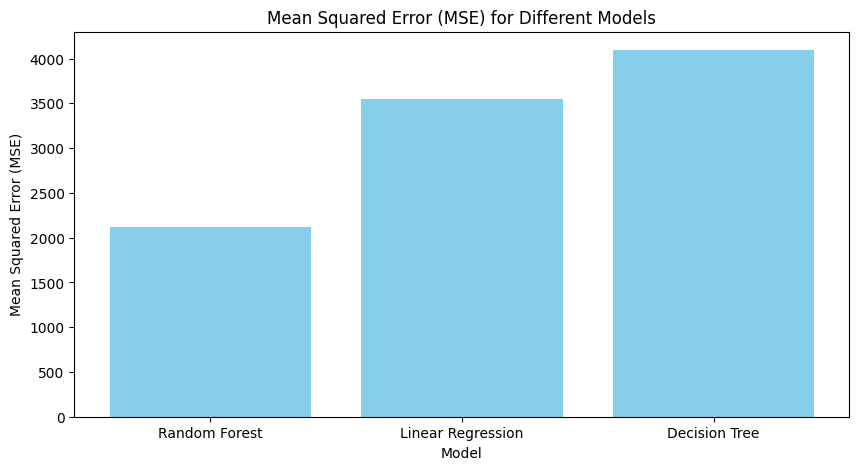

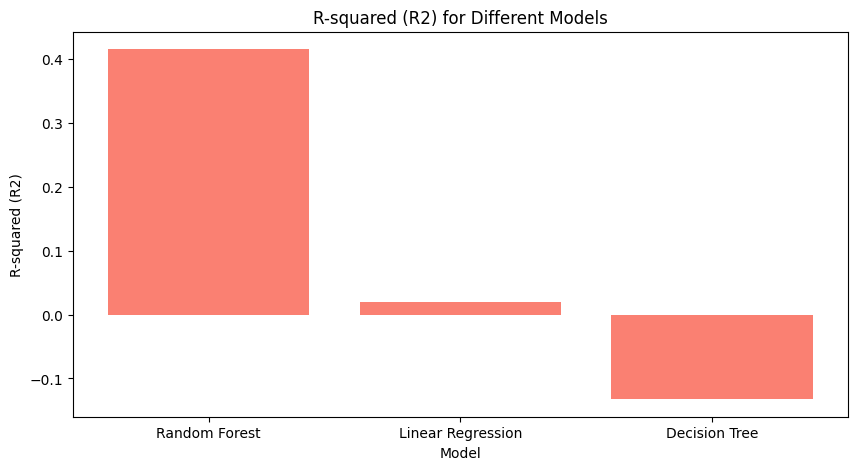

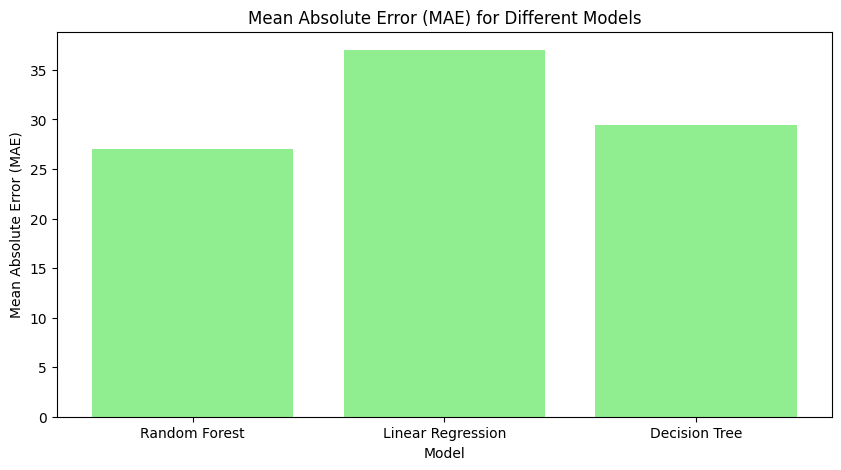

In [53]:
models = ['Random Forest', 'Linear Regression', 'Decision Tree']
mse_values = [mse_model1, mse_model2, mse_model3]
r2_values = [r2_model1, r2_model2, r2_model3]
mae_values = [mae_model1, mae_model2, mae_model3]

# Plotting MSE
plt.figure(figsize=(10, 5))
plt.bar(models, mse_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) for Different Models')
plt.show()

# Plotting R2
plt.figure(figsize=(10, 5))
plt.bar(models, r2_values, color='salmon')
plt.xlabel('Model')
plt.ylabel('R-squared (R2)')
plt.title('R-squared (R2) for Different Models')
plt.show()

# Plotting MAE
plt.figure(figsize=(10, 5))
plt.bar(models, mae_values, color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Mean Absolute Error (MAE) for Different Models')
plt.show()